In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from linearmodels import PanelOLS

In [2]:
path = '/Users/gianlucafilesi/Library/CloudStorage/OneDrive-EDHEC/04 THESIS/00_FINAL/DS/'

GDP dataset source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD  
GDP per capita dataset source: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

In [3]:
gdp_pc = pd.read_csv(path+'GDP-PC.csv',skiprows=4) # Upload the GDP per capita data

HDR dataset source: https://hdr.undp.org/data-center/documentation-and-downloads

In [4]:
hdr = pd.read_excel(path+'hdr-data.xlsx') # Upload the HDR data

In [5]:
Countries = {hdr['countryIsoCode'][i]:hdr['country'][i] for i in range(len(hdr))} # Create a dictionary to map country codes to country names

In [6]:
HDR = hdr.copy().drop(columns=['dimension','note','country']) # Drop unnecessary columns
HDR['year'] = pd.to_datetime(HDR['year'], format='%Y',errors='coerce').dt.year # Convert year to datetime format
HDR.rename(columns={'countryIsoCode':'CCode'},inplace=True) # Rename columns for consistency

In [7]:
'''
Since the HDR data contains multiple indices, we need to separate them into different dataframes.
We will create a dictionary to store these dataframes, where the keys are the index codes and the values are the corresponding dataframes.
'''
indecies = HDR['indexCode'].unique() # Get unique Country codes
grouped_dfs = {} # Create a dictionary to store dataframes for each index

for code in indecies:
    grouped_dfs[code] = HDR[HDR['indexCode'] == code].drop(columns=['indexCode', 'index']) # Drop unnecessary columns

GII = grouped_dfs.get('GII') # Get the GII dataframe
HDI = grouped_dfs.get('HDI') # Get the HDI dataframe
GDI = grouped_dfs.get('GDI') # Get the GDI dataframe
IHDI = grouped_dfs.get('IHDI') # Get the IHDI dataframe
PHDI = grouped_dfs.get('PHDI') # Get the PHDI dataframe
MPI = grouped_dfs.get('MPI') # Get the MPI dataframe


In [8]:
def Pivoting(df): # Function to pivot the dataframe
    df_r = df.pivot(index=['CCode','year'], 
                       columns='indicator', 
                       values='value')
    df_r.reset_index(inplace=True)
    df_r.columns.name = None
    return df_r

GII explanation: https://hdr.undp.org/data-center/thematic-composite-indices/gender-inequality-index#/indicies/GII  

GII reflects gender-based disadvantage in three dimensions— reproductive health, empowerment and the labour market—for as many countries as data of reasonable quality allow. It shows the loss in potential human development due to inequality between female and male achievements in these dimensions. It ranges from 0, where women and men fare equally, to 1, where one gender fares as poorly as possible in all measured dimensions. GII values are computed using the association-sensitive inequality measure suggested by Seth (2009), which implies that the index is based on the general mean of general means of different orders—the first aggregation is by a geometric mean across dimensions; these means, calculated separately for women and men, are then aggregated using a harmonic mean across genders.

In [9]:
GII_r = Pivoting(GII) # Pivot the GII dataframe
GII_r.drop(columns=['GII Rank'],inplace=True) # Drop the GII Rank column
col_to_move = GII_r.pop('Gender Inequality Index (value)')
GII_r.insert(3, 'GII_value', col_to_move) # Move the GII value column to the 3rd position
GII_r

,CCode,year,"Adolescent Birth Rate (births per 1,000 women ages 15-19)",GII_value,"Labour force participation rate, female (% ages 15 and older)","Labour force participation rate, male (% ages 15 and older)","Maternal Mortality Ratio (deaths per 100,000 live births)","Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Share of seats in parliament, female (% held by women)","Share of seats in parliament, male (% held by men)"
0,AFG,1990.0,142.960,NaN,NaN,NaN,1377.859,1.108,7.899,NaN,NaN
1,AFG,1991.0,147.525,NaN,NaN,NaN,1392.786,1.221,8.138,NaN,NaN
2,AFG,1992.0,147.521,NaN,NaN,NaN,1451.594,1.335,8.377,NaN,NaN
3,AFG,1993.0,147.896,NaN,NaN,NaN,1368.816,1.449,8.616,NaN,NaN
4,AFG,1994.0,155.669,NaN,NaN,NaN,1375.091,1.562,8.855,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6801,ZZM.LDC,2022.0,92.400,0.556,50.4,75.5,NaN,23.400,33.800,25.1,NaN
6802,ZZN.SIDS,2020.0,NaN,NaN,NaN,NaN,203.000,NaN,NaN,NaN,NaN
6803,ZZN.SIDS,2022.0,50.600,0.457,51.4,69.8,NaN,58.800,62.300,27.0,NaN
6804,ZZO.OECD,2020.0,NaN,NaN,NaN,NaN,21.000,NaN,NaN,NaN,NaN


GDI explanation: https://hdr.undp.org/gender-development-index#/indicies/GDI  

GDI measures gender inequalities in achievement in three basic dimensions of human development: health, measured by female and male life expectancy at birth; education, measured by female and male expected years of schooling for children and female and male mean years of schooling for adults ages 25 years and older; and command over economic resources, measured by female and male estimated earned income.

In [10]:
GDI_r = Pivoting(GDI) # Pivot the GDI dataframe
col_to_move = GDI_r.pop('Gender Development Index (value)') # Move the GDI value column to the 3rd position
GDI_r.insert(3, 'GDI_value', col_to_move)
col_to_move = GDI_r.pop('GDI Group') # Move the GDI Group column to the 4th position
GDI_r.insert(4, 'GDI Group', col_to_move)
GDI_r

,CCode,year,"Expected Years of Schooling, female (years)",GDI_value,GDI Group,"Expected Years of Schooling, male (years)","Gross National Income Per Capita, female (2017 PPP$)","Gross National Income Per Capita, male (2017 PPP$)",HDI female,HDI male,"Life Expectancy at Birth, female (years)","Life Expectancy at Birth, male (years)","Mean Years of Schooling, female (years)","Mean Years of Schooling, male (years)"
0,AFG,1990.0,2.117,NaN,NaN,4.533,NaN,NaN,NaN,NaN,48.397,43.709,0.202,1.494
1,AFG,1991.0,2.246,NaN,NaN,4.768,NaN,NaN,NaN,NaN,49.144,44.353,0.219,1.579
2,AFG,1992.0,2.383,NaN,NaN,5.016,NaN,NaN,NaN,NaN,50.320,45.070,0.236,1.664
3,AFG,1993.0,2.528,NaN,NaN,5.277,NaN,NaN,NaN,NaN,52.739,50.216,0.254,1.749
4,AFG,1994.0,2.682,NaN,NaN,5.551,NaN,NaN,NaN,NaN,53.544,49.531,0.271,1.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,ZZK.WORLD,2022.0,13.082,0.951,NaN,12.908,12515.518,22034.766,0.719,0.756,74.532,69.599,8.231,9.118
6798,ZZL.DC,2022.0,12.600,0.929,NaN,12.500,7283.000,14943.000,0.716,0.665,72.900,68.200,7.100,8.200
6799,ZZM.LDC,2022.0,9.900,0.890,NaN,10.300,2042.000,4054.000,0.509,0.572,67.400,62.500,4.300,5.900
6800,ZZN.SIDS,2022.0,12.900,0.979,NaN,12.300,13079.000,19712.000,0.722,0.738,74.300,69.000,8.500,8.800


HDI explanation: https://hdr.undp.org/data-center/human-development-index#/indicies/HDI  


The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

The health dimension is assessed by life expectancy at birth, the education dimension is measured by mean of years of schooling for adults aged 25 years and more and expected years of schooling for children of school entering age. The standard of living dimension is measured by gross national income per capita. The HDI uses the logarithm of income, to reflect the diminishing importance of income with increasing GNI. The scores for the three HDI dimension indices are then aggregated into a composite index using geometric mean. Refer to Technical notes for more details.

In [11]:
HDI_r = Pivoting(HDI)
HDI_r.drop(columns=['HDI Rank'],inplace=True)
col_to_move = HDI_r.pop('Human Development Index (value)')
HDI_r.insert(3, 'HDI_value', col_to_move)
HDI_r

,CCode,year,Expected Years of Schooling (years),HDI_value,Gross National Income Per Capita (2017 PPP$),Life Expectancy at Birth (years),Mean Years of Schooling (years)
0,AFG,1990.0,2.936,0.284,3115.670,45.967,0.872
1,AFG,1991.0,3.228,0.292,2817.305,46.663,0.915
2,AFG,1992.0,3.520,0.299,2474.682,47.596,0.959
3,AFG,1993.0,3.812,0.307,1723.020,51.466,1.002
4,AFG,1994.0,4.104,0.300,1202.010,51.495,1.045
...,...,...,...,...,...,...,...
6825,ZZO.OECD,2015.0,NaN,0.894,NaN,NaN,NaN
6826,ZZO.OECD,2019.0,NaN,0.905,NaN,NaN,NaN
6827,ZZO.OECD,2020.0,NaN,0.897,NaN,NaN,NaN
6828,ZZO.OECD,2021.0,NaN,0.899,NaN,NaN,NaN


Countries can be divided in 4 categories: Very high human development (>0.8), High human development (0.700-0.799), Medium human development (0.550-0.699), Low human development (<0.550). https://hdr.undp.org/sites/default/files/2023-24_HDR/hdr2023-24_technical_notes.pdf  

In [12]:
bins = [0, 0.55, 0.7, 0.8, 1]
labels = ['L', 'M', 'H', 'VH']

HDI_r['Category'] = pd.cut(HDI_r['HDI_value'], bins=bins, labels=labels, include_lowest=True)

IHDI explanation: https://hdr.undp.org/inequality-adjusted-human-development-index#/indicies/IHDI  

IHDI is based on a distribution-sensitive class of composite indices proposed by Foster, Lopez-Calva and Szekely (2005), which draws on the Atkinson (1970) family of inequality measures. It is computed as a geometric mean of inequality-adjusted dimensional indices. The IHDI accounts for inequalities in HDI dimensions by “discounting” each dimension’s average value according to its level of inequality. The IHDI value equals the HDI value when there is no inequality across people but falls below the HDI value as inequality rises. In this sense, the IHDI measures the level of human development when inequality is accounted for.

In [13]:
IHDI_r = Pivoting(IHDI)
col_to_move = IHDI_r.pop('Inequality-adjusted Human Development Index (value)')
IHDI_r.insert(3, 'IHDI_value', col_to_move)
IHDI_r

,CCode,year,Coefficient of human inequality,IHDI_value,Inequality in eduation,Inequality in income,Inequality in life expectancy,Overall loss (%)
0,AFG,2010.0,35.768,0.287,44.823,28.638,33.842,36.080
1,AFG,2011.0,35.453,0.293,44.823,28.638,32.897,35.886
2,AFG,2012.0,34.755,0.302,44.823,27.406,32.036,35.332
3,AFG,2013.0,34.478,0.309,44.823,27.406,31.204,34.947
4,AFG,2014.0,34.322,0.313,44.823,27.406,30.736,34.792
...,...,...,...,...,...,...,...,...
2677,ZZK.WORLD,2022.0,21.732,0.576,21.725,30.330,13.141,22.057
2678,ZZL.DC,2022.0,24.200,0.524,25.000,32.500,14.900,NaN
2679,ZZM.LDC,2022.0,32.700,0.363,36.200,38.600,23.400,NaN
2680,ZZN.SIDS,2022.0,23.200,0.558,22.000,32.700,14.900,NaN


In [14]:
GDP_PC = gdp_pc.copy().drop(columns=['Indicator Name','Indicator Code','Unnamed: 68','Country Name'])
GDP_PC.rename(columns={'Country Code':'CCode'},inplace=True)
GDP_PC = GDP_PC.melt(id_vars=['CCode'],var_name='year',value_name='GDP_PC_value')
GDP_PC['year'] = pd.to_datetime(GDP_PC['year'], format='%Y',errors='coerce').dt.year
GDP_PC

,CCode,year,GDP_PC_value
0,ABW,1960,NaN
1,AFE,1960,186.132432
2,AFG,1960,NaN
3,AFW,1960,121.938353
4,AGO,1960,NaN
...,...,...,...
17019,XKX,2023,5960.158205
17020,YEM,2023,477.409029
17021,ZAF,2023,6022.542542
17022,ZMB,2023,1330.727806


## GII on GDP_PC

In [15]:
GDP_PC_reduced = GDP_PC[GDP_PC['year']>=GDI_r['year'].min()]
GDP_PC_GII = pd.merge(
    GDP_PC_reduced, GII_r,
    on=["CCode", "year"], 
    how="inner"
)
GDP_PC_GII.columns.name = None

In [16]:
GDP_PC_GDI = pd.merge(  
    GDP_PC_reduced, GDI_r,
    on=["CCode", "year"], 
    how="inner"
)
GDP_PC_GDI.columns.name = None

In [17]:
GDP_PC_HDI = pd.merge(  
    GDP_PC_reduced, HDI_r,
    on=["CCode", "year"], 
    how="inner"
)
GDP_PC_HDI.columns.name = None

In [18]:
GDP_PC_IHDI = pd.merge(  
    GDP_PC_reduced, IHDI_r,
    on=["CCode", "year"], 
    how="inner"
)
GDP_PC_IHDI.columns.name = None

In [26]:
def PrepareData(df,ind): # Function to prepare the data for analysis
    Panel = df.copy()
    shift = ind.replace('_value', '') + '_shifted'
    Panel['logGDP_PC'] = np.log(Panel['GDP_PC_value']) # Create a new column with the log of the index
    Panel[shift] = Panel.groupby('CCode')[ind].shift(1)
    Panel.dropna(inplace=True) # Drop rows with NaN values
    return Panel

In [27]:
Panel_GII = PrepareData(GDP_PC_GII,'GII_value') # Prepare the GII data
Panel_GDI = PrepareData(GDP_PC_GDI,'GDI_value') # Prepare the GDI data
Panel_HDI = PrepareData(GDP_PC_HDI,'HDI_value') # Prepare the HDI data
Panel_IHDI = PrepareData(GDP_PC_IHDI,'IHDI_value') # Prepare the IHDI data

In [28]:
Panel_GII

,CCode,year,GDP_PC_value,"Adolescent Birth Rate (births per 1,000 women ages 15-19)",GII_value,"Labour force participation rate, female (% ages 15 and older)","Labour force participation rate, male (% ages 15 and older)","Maternal Mortality Ratio (deaths per 100,000 live births)","Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Share of seats in parliament, female (% held by women)","Share of seats in parliament, male (% held by men)",logGDP_PC,GII_shifted
200,ARG,1991,5709.247841,71.979,0.453,39.60,75.08,82.481,36.269,38.548,22.796,77.204,8.649843,0.489
203,AUS,1991,18859.907458,21.491,0.184,50.85,72.42,8.785,89.743,90.543,20.536,79.464,9.844794,0.185
204,AUT,1991,22323.131249,24.035,0.202,45.10,70.63,8.361,63.208,85.207,24.696,75.304,10.013379,0.202
207,BEL,1991,21041.660652,12.393,0.179,38.01,61.40,7.643,59.260,67.039,15.837,84.163,9.954260,0.180
208,BEN,1991,364.689296,124.259,0.696,56.60,98.64,549.945,4.699,15.143,7.229,92.771,5.899046,0.699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,WSM,2022,3869.466395,43.766,0.406,49.80,80.63,59.079,92.442,86.987,12.963,87.037,8.260872,0.436
6431,YEM,2022,615.702079,52.497,0.820,5.84,64.69,183.400,23.700,38.200,0.294,99.706,6.422763,0.821
6432,ZAF,2022,6523.410978,60.891,0.401,50.82,63.46,126.833,83.043,84.881,45.374,54.626,8.783153,0.401
6433,ZMB,2022,1447.123101,116.091,0.526,54.16,66.36,134.665,33.732,51.363,15.060,84.940,7.277333,0.526


# Scatter plots

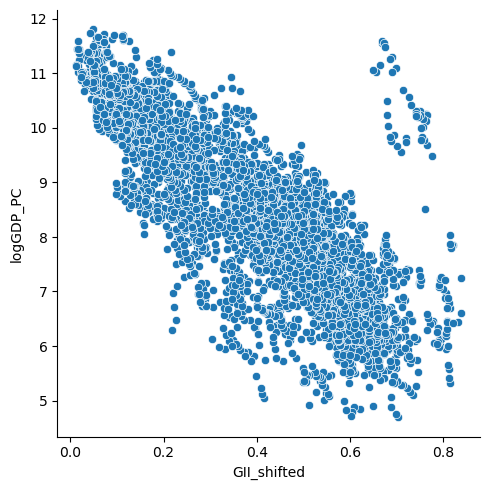

In [29]:
sns.relplot(
    data=Panel_GII, kind="scatter",
    y="logGDP_PC", x="GII_shifted",
    facet_kws=dict(sharex=False),
)

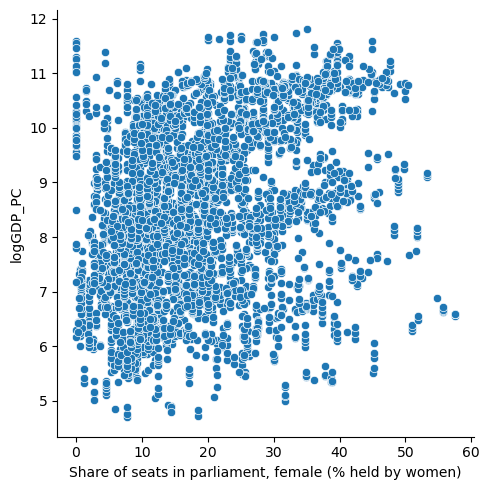

In [30]:
sns.relplot(
    data=Panel_GII, kind="scatter",
    y="logGDP_PC", x='Share of seats in parliament, female (% held by women)',
    facet_kws=dict(sharex=False),
)

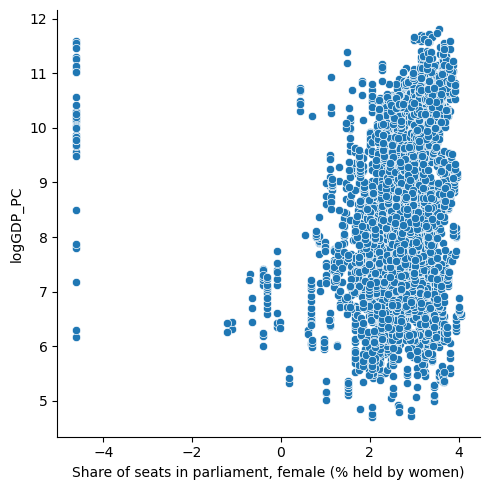

In [31]:
x = np.log(Panel_GII['Share of seats in parliament, female (% held by women)'])
sns.relplot(
    data=Panel_GII, kind="scatter",
    y="logGDP_PC", x=x,
    facet_kws=dict(sharex=False),
)

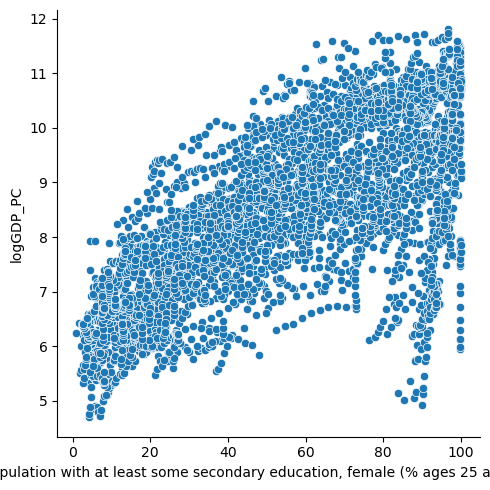

In [32]:
sns.relplot(
    data=Panel_GII, kind="scatter",
    y="logGDP_PC", x='Population with at least some secondary education, female (% ages 25 and older)',
    facet_kws=dict(sharex=False),
)

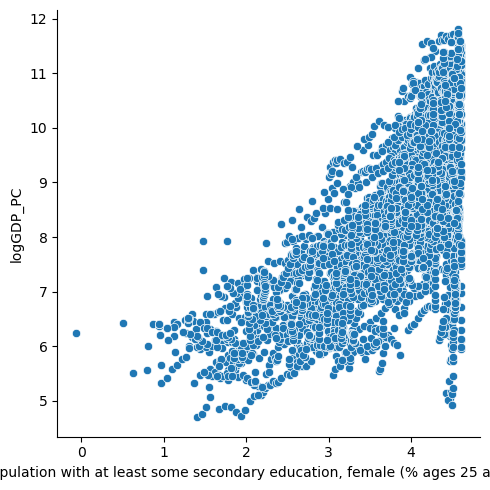

In [33]:
x = np.log(Panel_GII['Population with at least some secondary education, female (% ages 25 and older)'])
sns.relplot(
    data=Panel_GII, kind="scatter",
    y="logGDP_PC", x=x,
    facet_kws=dict(sharex=False),
)

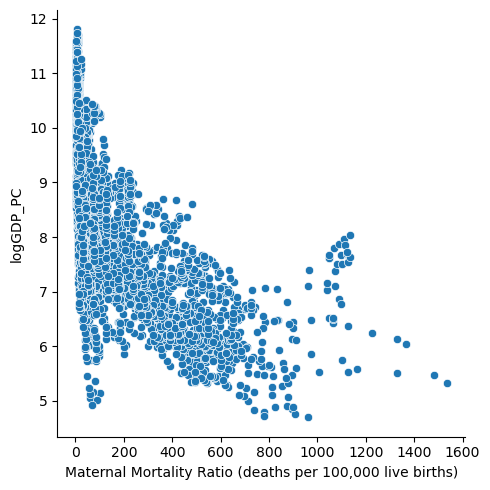

In [34]:
sns.relplot(
    data=Panel_GII, kind="scatter",
    y="logGDP_PC", x='Maternal Mortality Ratio (deaths per 100,000 live births)',
    facet_kws=dict(sharex=False),
)

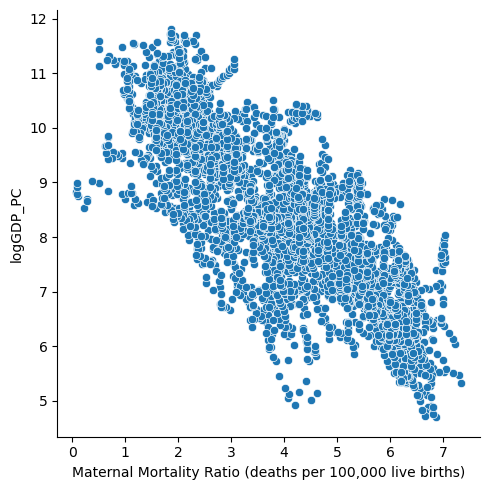

In [35]:
x = np.log(Panel_GII['Maternal Mortality Ratio (deaths per 100,000 live births)'])
sns.relplot(
    data=Panel_GII, kind="scatter",
    y="logGDP_PC", x=x,
    facet_kws=dict(sharex=False),
)

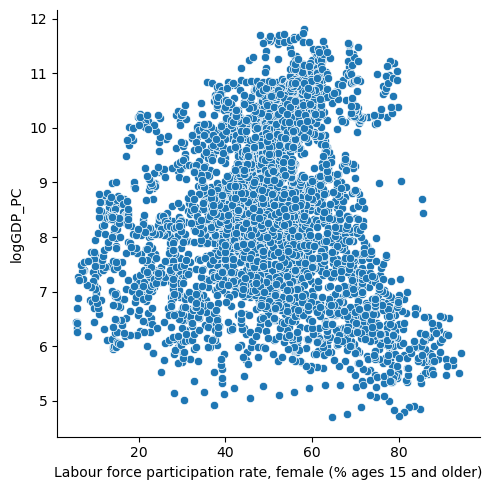

In [36]:
sns.relplot(
    data=Panel_GII, kind="scatter",
    y="logGDP_PC", x='Labour force participation rate, female (% ages 15 and older)',
    facet_kws=dict(sharex=False),
)

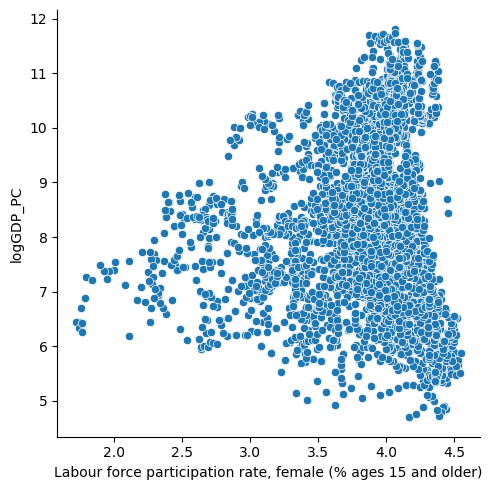

In [37]:
x = np.log(Panel_GII['Labour force participation rate, female (% ages 15 and older)'])
sns.relplot(
    data=Panel_GII, kind="scatter",
    y="logGDP_PC", x=x,
    facet_kws=dict(sharex=False),
)

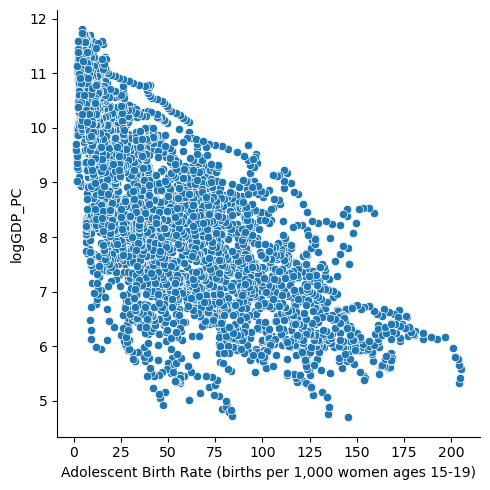

In [38]:
sns.relplot(
    data=Panel_GII, kind="scatter",
    y="logGDP_PC", x='Adolescent Birth Rate (births per 1,000 women ages 15-19)',
    facet_kws=dict(sharex=False),
)

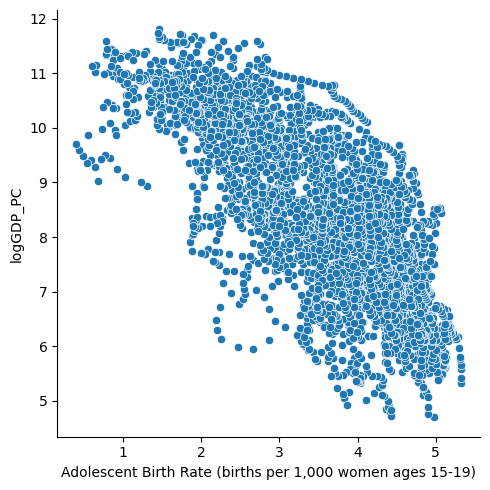

In [39]:
x = np.log(Panel_GII['Adolescent Birth Rate (births per 1,000 women ages 15-19)'])
sns.relplot(
    data=Panel_GII, kind="scatter",
    y="logGDP_PC", x=x,
    facet_kws=dict(sharex=False),
)

# Regression on GII

In [40]:
Panel_GII['logMMR'] = np.log(Panel_GII['Maternal Mortality Ratio (deaths per 100,000 live births)'])
Panel_GII['logABR'] = np.log(Panel_GII['Adolescent Birth Rate (births per 1,000 women ages 15-19)'])
model_df = Panel_GII[['CCode', 'year', 'logGDP_PC', 'GII_shifted','Share of seats in parliament, female (% held by women)','Population with at least some secondary education, female (% ages 25 and older)','Labour force participation rate, female (% ages 15 and older)','logMMR','logABR']]
model_df = model_df.set_index(['CCode', 'year'])

In [41]:
Y = model_df['logGDP_PC']
X = model_df[['GII_shifted']]
X = sm.add_constant(X)

mod_fe = PanelOLS(Y,X, entity_effects=True, time_effects=True)
results = mod_fe.fit(cov_type='clustered',cluster_entity=True)

print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              logGDP_PC   R-squared:                        0.0068
Estimator:                   PanelOLS   R-squared (Between):              0.0852
No. Observations:                4227   R-squared (Within):               0.0778
Date:                Sat, Apr 26 2025   R-squared (Overall):              0.0929
Time:                        17:25:57   Log-likelihood                   -83.215
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      27.775
Entities:                         165   P-value                           0.0000
Avg Obs:                       25.618   Distribution:                  F(1,4030)
Min Obs:                       3.0000                                           
Max Obs:                       32.000   F-statistic (robust):             1.3239
                            

### Problems

There is a huge problem here: strict exogenity. GII is calculated by other indicators.

In [42]:
X = model_df[['GII_shifted','logABR']]
X = sm.add_constant(X)

mod_fe = PanelOLS(Y,X, entity_effects=True, time_effects=True)
results = mod_fe.fit(cov_type='clustered',cluster_entity=True)

print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              logGDP_PC   R-squared:                        0.0300
Estimator:                   PanelOLS   R-squared (Between):             -0.0836
No. Observations:                4227   R-squared (Within):               0.0024
Date:                Sat, Apr 26 2025   R-squared (Overall):             -0.0628
Time:                        17:25:57   Log-likelihood                   -33.462
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      62.200
Entities:                         165   P-value                           0.0000
Avg Obs:                       25.618   Distribution:                  F(2,4029)
Min Obs:                       3.0000                                           
Max Obs:                       32.000   F-statistic (robust):             4.2520
                            

In [43]:
X = model_df[['GII_shifted','logABR','logMMR']]
X = sm.add_constant(X)

mod_fe = PanelOLS(Y,X, entity_effects=True, time_effects=True)
results = mod_fe.fit(cov_type='clustered',cluster_entity=True)

print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              logGDP_PC   R-squared:                        0.1202
Estimator:                   PanelOLS   R-squared (Between):              0.3771
No. Observations:                4227   R-squared (Within):               0.2118
Date:                Sat, Apr 26 2025   R-squared (Overall):              0.3544
Time:                        17:25:58   Log-likelihood                    172.97
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      183.47
Entities:                         165   P-value                           0.0000
Avg Obs:                       25.618   Distribution:                  F(3,4028)
Min Obs:                       3.0000                                           
Max Obs:                       32.000   F-statistic (robust):             14.029
                            

In [44]:
X = model_df[['GII_shifted','logMMR','logABR','Population with at least some secondary education, female (% ages 25 and older)']]
X = sm.add_constant(X)

mod_fe = PanelOLS(Y,X, entity_effects=True, time_effects=True)
results = mod_fe.fit(cov_type='clustered',cluster_entity=True)

print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              logGDP_PC   R-squared:                        0.1227
Estimator:                   PanelOLS   R-squared (Between):              0.4245
No. Observations:                4227   R-squared (Within):               0.2658
Date:                Sat, Apr 26 2025   R-squared (Overall):              0.4017
Time:                        17:25:58   Log-likelihood                    178.97
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      140.82
Entities:                         165   P-value                           0.0000
Avg Obs:                       25.618   Distribution:                  F(4,4027)
Min Obs:                       3.0000                                           
Max Obs:                       32.000   F-statistic (robust):             11.923
                            

In [45]:
X = model_df[['GII_shifted','logMMR','logABR','Population with at least some secondary education, female (% ages 25 and older)','Labour force participation rate, female (% ages 15 and older)']]
X = sm.add_constant(X)

mod_fe = PanelOLS(Y,X, entity_effects=True, time_effects=True)
results = mod_fe.fit(cov_type='clustered',cluster_entity=True)

print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              logGDP_PC   R-squared:                        0.1251
Estimator:                   PanelOLS   R-squared (Between):              0.4246
No. Observations:                4227   R-squared (Within):               0.2634
Date:                Sat, Apr 26 2025   R-squared (Overall):              0.4002
Time:                        17:25:58   Log-likelihood                    184.68
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      115.11
Entities:                         165   P-value                           0.0000
Avg Obs:                       25.618   Distribution:                  F(5,4026)
Min Obs:                       3.0000                                           
Max Obs:                       32.000   F-statistic (robust):             9.9402
                            

In [46]:
X = model_df[['GII_shifted','logMMR','logABR','Population with at least some secondary education, female (% ages 25 and older)','Labour force participation rate, female (% ages 15 and older)','Share of seats in parliament, female (% held by women)']]
X = sm.add_constant(X)

mod_fe = PanelOLS(Y,X, entity_effects=True, time_effects=True)
results = mod_fe.fit(cov_type='clustered',cluster_entity=True)

print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              logGDP_PC   R-squared:                        0.1291
Estimator:                   PanelOLS   R-squared (Between):              0.4254
No. Observations:                4227   R-squared (Within):               0.2263
Date:                Sat, Apr 26 2025   R-squared (Overall):              0.3953
Time:                        17:25:59   Log-likelihood                    194.37
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      99.428
Entities:                         165   P-value                           0.0000
Avg Obs:                       25.618   Distribution:                  F(6,4025)
Min Obs:                       3.0000                                           
Max Obs:                       32.000   F-statistic (robust):             9.1224
                            

# Regression on GDI

In [49]:
Panel_GDI

,CCode,year,GDP_PC_value,"Expected Years of Schooling, female (years)",GDI_value,GDI Group,"Expected Years of Schooling, male (years)","Gross National Income Per Capita, female (2017 PPP$)","Gross National Income Per Capita, male (2017 PPP$)",HDI female,HDI male,"Life Expectancy at Birth, female (years)","Life Expectancy at Birth, male (years)","Mean Years of Schooling, female (years)","Mean Years of Schooling, male (years)",logGDP_PC,GDI_shifted
6240,AFG,2022,357.261153,8.053,0.622,5.0,13.228,395.915,2256.218,0.332,0.534,66.213,59.766,1.174,3.913,5.878467,0.717
6241,AGO,2022,2929.694455,11.535,0.905,4.0,12.910,4696.357,5973.846,0.561,0.620,64.541,59.351,4.463,7.188,7.982653,0.898
6242,ALB,2022,6846.426143,14.681,0.977,1.0,14.292,13198.540,17398.004,0.780,0.798,79.472,74.502,9.811,10.434,8.831482,0.981
6244,ARE,2022,49899.065298,19.753,0.986,1.0,16.380,51509.567,84087.850,0.923,0.936,81.412,77.720,12.588,12.906,10.817758,0.981
6245,ARG,2022,13935.681111,20.915,0.995,1.0,17.130,16933.063,27264.831,0.841,0.845,79.277,72.851,11.392,10.858,9.542208,0.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,WSM,2022,3869.466395,12.988,0.968,2.0,11.931,3314.286,6562.380,0.687,0.709,75.333,70.146,11.768,10.957,8.260872,0.970
6431,YEM,2022,615.702079,6.882,0.456,5.0,8.920,149.972,2041.916,0.219,0.480,67.222,60.493,1.755,3.588,6.422763,0.457
6432,ZAF,2022,6523.410978,14.845,0.985,1.0,13.699,10423.352,16095.307,0.710,0.721,64.181,58.597,11.499,11.724,8.783153,0.984
6433,ZMB,2022,1447.123101,11.075,0.930,3.0,10.984,2530.869,3800.491,0.548,0.589,64.510,59.058,6.433,8.326,7.277333,0.939


In [50]:
model_df = Panel_GDI[['CCode', 'year', 'logGDP_PC', 'GDI_shifted']]
model_df = model_df.set_index(['CCode', 'year'])

In [52]:
Y = model_df['logGDP_PC']
X = model_df[['GDI_shifted']]
X = sm.add_constant(X)

mod_fe = PanelOLS(Y,X, entity_effects=True, time_effects=True)
results = mod_fe.fit(cov_type='clustered',cluster_entity=True)

print(results.summary)

ValueError: No objects to concatenate

In [80]:
gii_r = GII_r[['CCode','year','GII_value']]
gdi_r = GDI_r[['CCode','year','GDI_value','GDI Group']]
hdi_r = HDI_r[['CCode','year','HDI_value','Category']]
ihdi_r = IHDI_r[['CCode','year','IHDI_value']]

In [81]:
GDP_PC 

,CCode,year,GDP_PC_value
0,ABW,1960,NaN
1,AFE,1960,186.132432
2,AFG,1960,NaN
3,AFW,1960,121.938353
4,AGO,1960,NaN
...,...,...,...
17019,XKX,2023,5960.158205
17020,YEM,2023,477.409029
17021,ZAF,2023,6022.542542
17022,ZMB,2023,1330.727806


In [82]:
df = pd.merge(
    GDP_PC, gii_r,
    on=["CCode", "year"], 
    how="outer"
)
df = pd.merge(
    df, gdi_r,
    on=["CCode", "year"], 
    how="outer"
)
df = pd.merge(
    df, hdi_r,
    on=["CCode", "year"], 
    how="outer"
)
df = pd.merge(
    df, ihdi_r,
    on=["CCode", "year"], 
    how="outer"
)
df['logGDP_PC'] = np.log(df['GDP_PC_value']) # Create a new column with the log of the index

In [83]:
df.columns

Index(['CCode', 'year', 'GDP_PC_value', 'GII_value', 'GDI_value', 'GDI Group',
       'HDI_value', 'Category', 'IHDI_value', 'logGDP_PC'],
      dtype='object')

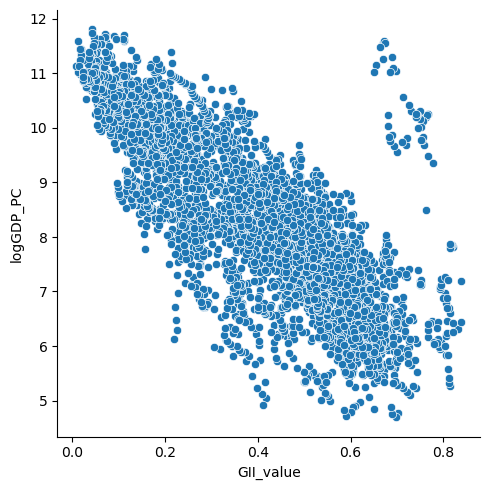

In [ ]:
sns.relplot(
    data=df, kind="scatter",
    y="logGDP_PC", x='GII_value',
    facet_kws=dict(sharex=False),
)

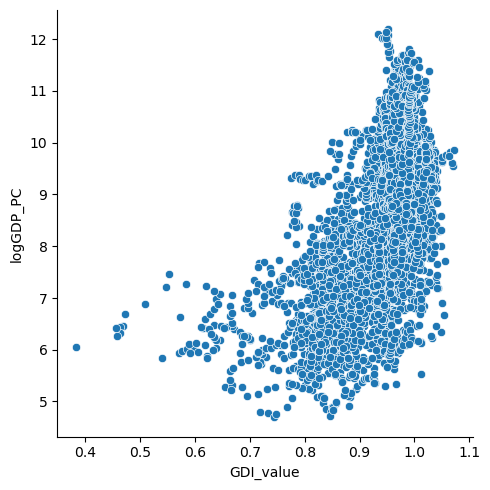

In [85]:
sns.relplot(
    data=df, kind="scatter",
    y="logGDP_PC", x='GDI_value',
    facet_kws=dict(sharex=False),
)

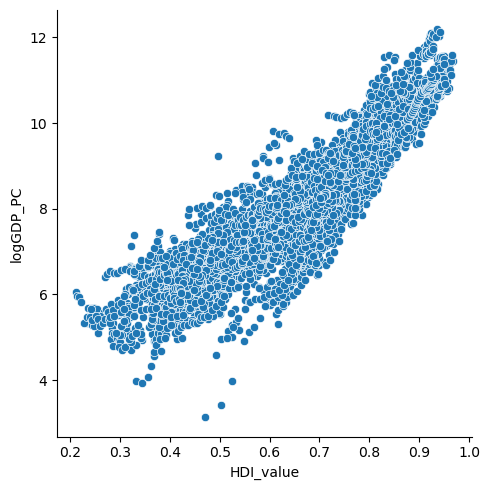

In [86]:
sns.relplot(
    data=df, kind="scatter",
    y="logGDP_PC", x='HDI_value',
    facet_kws=dict(sharex=False),
)

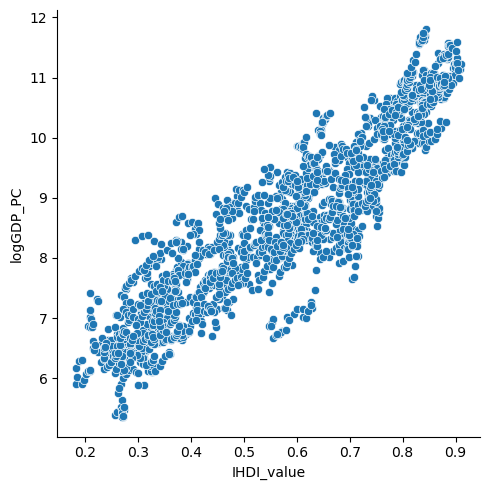

In [87]:
sns.relplot(
    data=df, kind="scatter",
    y="logGDP_PC", x='IHDI_value',
    facet_kws=dict(sharex=False),
)

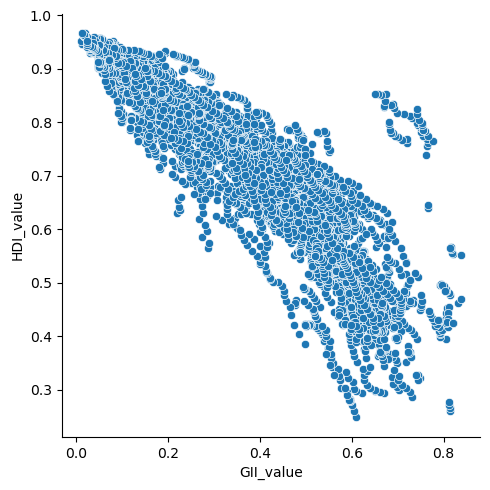

In [88]:
sns.relplot(
    data=df, kind="scatter",
    y="HDI_value", x='GII_value',
    facet_kws=dict(sharex=False),
)

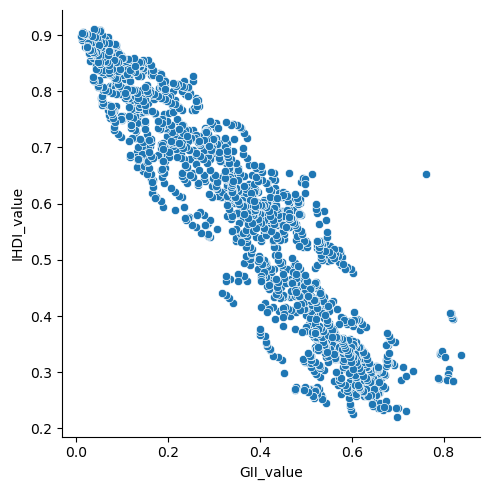

In [89]:
sns.relplot(
    data=df, kind="scatter",
    y="IHDI_value", x='GII_value',
    facet_kws=dict(sharex=False),
)

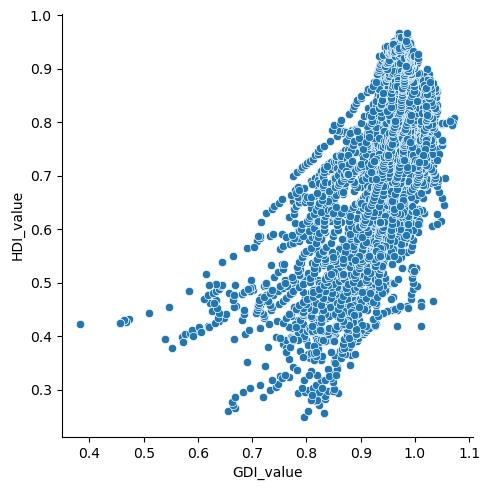

In [90]:
sns.relplot(
    data=df, kind="scatter",
    y="HDI_value", x='GDI_value',
    facet_kws=dict(sharex=False),
)

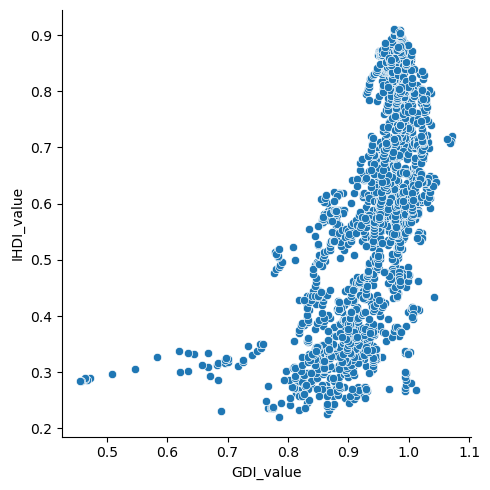

In [91]:
sns.relplot(
    data=df, kind="scatter",
    y="IHDI_value", x='GDI_value',
    facet_kws=dict(sharex=False),
)

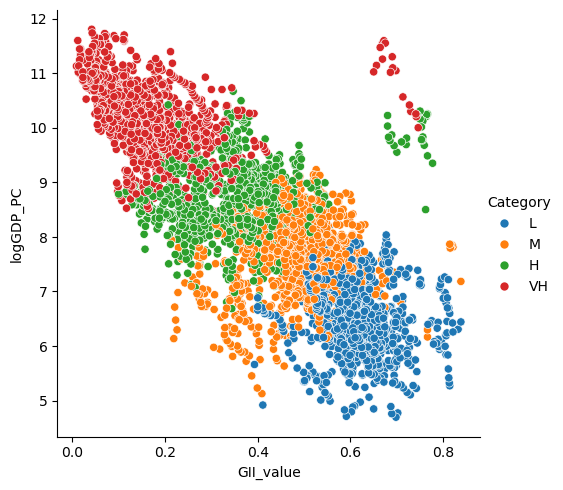

In [92]:
sns.relplot(
    data=df, kind="scatter",
    y="logGDP_PC", x='GII_value', hue='Category',
    facet_kws=dict(sharex=False),
)

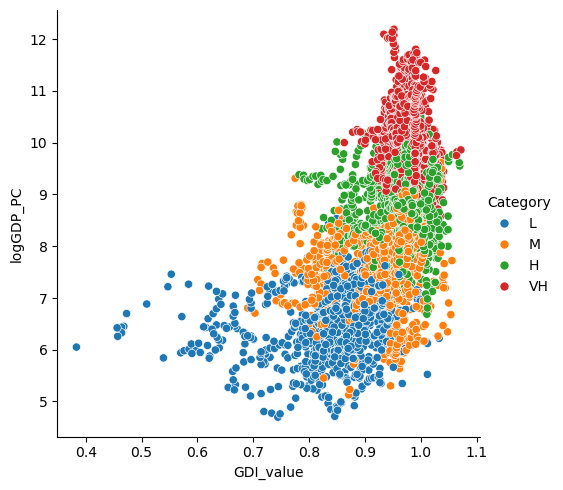

In [93]:
sns.relplot(
    data=df, kind="scatter",
    y="logGDP_PC", x='GDI_value', hue='Category',
    facet_kws=dict(sharex=False),
)

In [94]:
df['GII_Category'] = pd.qcut(df['GII_value'], q=4, labels=['VB', 'B', 'MB', 'NB'])

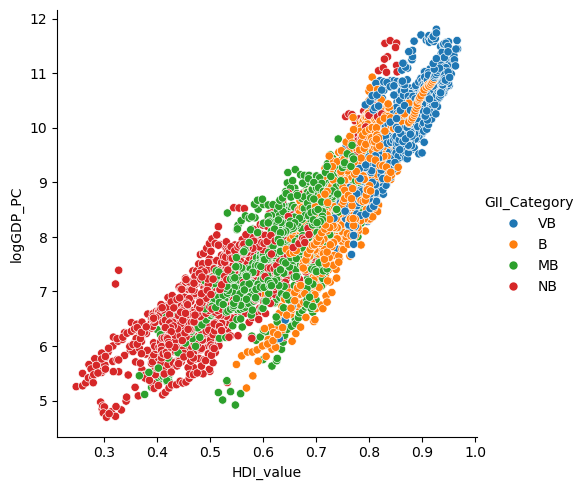

In [95]:
sns.relplot(
    data=df, kind="scatter",
    y="logGDP_PC", x='HDI_value', hue='GII_Category',
    facet_kws=dict(sharex=False),
)
